<a href="https://colab.research.google.com/github/tayfununal/2-Hidden-Layer-Neural-Networks/blob/master/Tik_3/householder_and_qr_decomposition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt


In [86]:
np.linalg.qr(np.random.randn(4,4))[0]

array([[-0.38809451, -0.37102136, -0.00762838, -0.84360394],
       [ 0.52510424, -0.47450681,  0.7053847 , -0.03925877],
       [ 0.41980736, -0.57730125, -0.69712703,  0.06707427],
       [-0.63040461, -0.55128006,  0.12801615,  0.53131176]])

In [89]:
a = []
for i in range(1000):
  a.append(torch.linalg.det(torch.from_numpy(np.linalg.qr(np.random.randn(4,4))[0])))
sum(a)

tensor(-1000., dtype=torch.float64)

In [50]:
np.linalg.qr(np.random.randn(2,2))[0]

array([[-0.6806706 , -0.73258961],
       [-0.73258961,  0.6806706 ]])

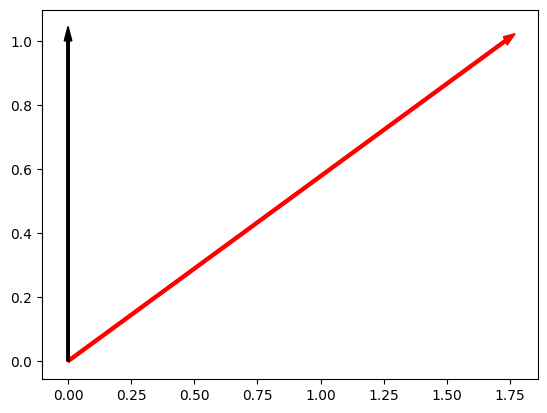

In [162]:
theta = torch.linspace(0,2*np.pi,10)

x = torch.tensor([[torch.math.sqrt(3)],[1.]])
u = torch.tensor([[0.],[1.]]).to(torch.float32)

plt.arrow(0,0,x[0].squeeze().numpy(), x[1].squeeze().numpy(), width=0.01, color="r")
plt.arrow(0,0,u[0].squeeze().numpy(), u[1].squeeze().numpy(), width=0.01, color="black")


In [200]:
def H(u, x):
  return torch.matmul((torch.eye(2) - 2. * (torch.matmul(u, u.T)/torch.matmul(u.T, u))), x)

def R(theta):
  return torch.tensor([[torch.cos(theta), -torch.sin(theta)],[torch.sin(theta), torch.cos(theta)]]).to(torch.float32)

In [199]:
sonuc = []
for i in theta:
  u = torch.matmul(torch.from_numpy(np.linalg.qr(np.random.randn(2,2))[0]).to(torch.float32), u)
  sonuc.append(H(u, x))

RuntimeError: mat1 and mat2 shapes cannot be multiplied (2x2 and 6x1)

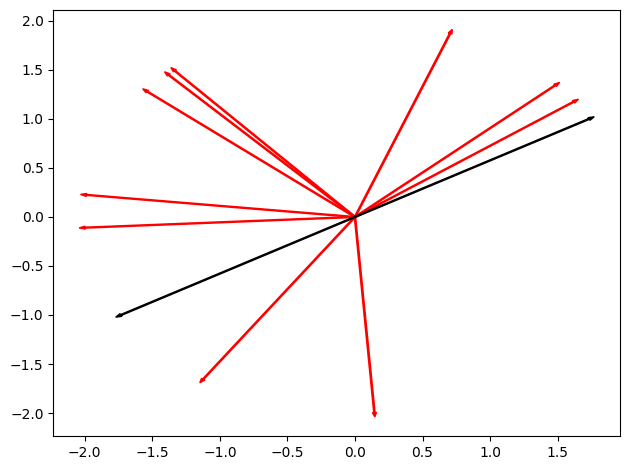

In [165]:
# Create subplots
fig, axes = plt.subplots(1)

# Display images
for i in sonuc:
  axes.arrow(0,0,i[0].squeeze().numpy(), i[1].squeeze().numpy(), width=0.01, color="r")

axes.arrow(0,0,x[0].squeeze().numpy(), x[1].squeeze().numpy(), width=0.01, color="black")
axes.arrow(0,0,-x[0].squeeze().numpy(), -x[1].squeeze().numpy(), width=0.01, color="black")
plt.tight_layout()
plt.show()


In [139]:
len(sonuc)

10

In [201]:
def H(u, x):
  return torch.matmul((torch.eye(3) - 2. * (torch.matmul(u, u.T)/torch.matmul(u.T, u))), x)

def Rotation(theta):
  return torch.tensor([[1., 0., 0.],[0, torch.cos(theta), -torch.sin(theta)],[0, torch.sin(theta), torch.cos(theta)]]).to(torch.float32)

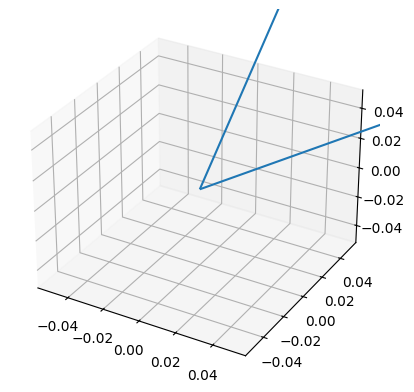

In [253]:
theta = torch.linspace(0,2*np.pi,1000)

x = torch.tensor([[0.],[0.],[0.],[torch.math.sqrt(3)],[1.],[1,]])
u = torch.tensor([[0.],[0.],[0.],[0.],[1.],[1,]]).to(torch.float32)

arrows = np.array([x,u])

fig = plt.figure()
X, Y, Z, U, V, W = zip(*arrows)
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)

plt.show()

In [254]:
H(u[3:],x[3:])

tensor([[ 1.7321],
        [-1.0000],
        [-1.0000]])

In [271]:
sonuc = torch.ones((1,3))
u = torch.tensor([[0.],[1.],[1,]]).to(torch.float32)
for i in range(100):
  u = torch.matmul(torch.from_numpy(np.linalg.qr(np.random.randn(3,3))[0]).to(torch.float32), u)
  sonuc = torch.cat((sonuc, H(u, x[3:]).reshape(1,3)), dim=0)
sonuc[1:]
sonuc = torch.cat((torch.zeros((len(sonuc[1:]),3)),sonuc[1:]), dim=1)

In [272]:
arrows = sonuc

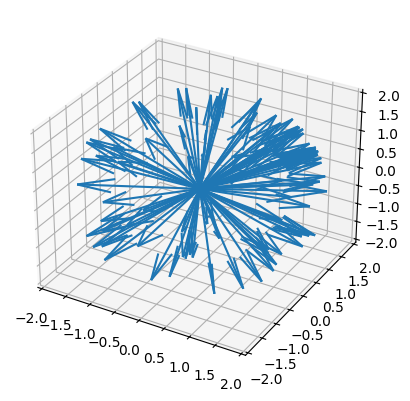

In [273]:
fig = plt.figure()
X, Y, Z, U, V, W = zip(*arrows)
ax = fig.add_subplot(111, projection='3d')
ax.quiver(X, Y, Z, U, V, W)


ax.set_xlim([-2, 2])
ax.set_ylim([-2, 2])
ax.set_zlim([-2, 2])
plt.show()